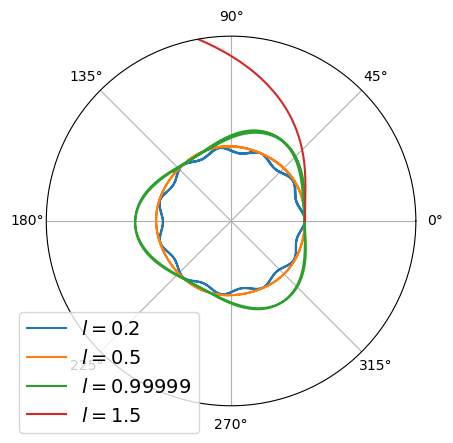

In [68]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import sympy as sy

# Variables
r, u, R, m, l = sy.symbols('r u R m l')

# Central force potential: V(r) = -2uR² / (r²((r/R)^m + (R/r)^m)²)
V = (-2 * u * R**2) / (r**2 * ((r/R)**m + (R/r)**m)**2)

# Effective potential adds the centrifugal angular-momentum barrier
V_eff = V + l**2 / (2 * r**2)

# Compute derivatives
dV_dr = sy.diff(V, r)
dVeff_dr  = sy.diff(V_eff, r)

V_func = sy.lambdify([r, u, R, m], V)
dV_func = sy.lambdify([r, u, R, m], dV_dr)
Veff_func = sy.lambdify([r, u, R, m, l], V_eff)
dVeff_func = sy.lambdify([r, u, R, m, l], dVeff_dr)

# Physical parameters
u_val = 2.0   # Potential strength
R_val = 1.0   # Characteristic radius
m_val = 2   # Shape exponent of the potential
l_val = 0.999999   # Angular momentum

# Initial conditions
r0  = 0.8   # Initial radial distance
dr_dtheta0  = 0.0   # Initial radial velocity w.r.t. angle (circular orbit start)

def orbit_ode(theta, y, u, R, m, l):
    r_val = y[0]
    dr_val = y[1]
    dv = dV_func(r_val, u, R, m)
    d2r = (2 * dr_val**2 / r_val 
           + r_val**2 / l**2 * (l**2 / r_val**2 - r_val**2 * dv))
    return [dr_val, d2r]

# Solve the ODE 
theta_start, theta_end = 0, 15
theta_values = np.linspace(theta_start, theta_end, 1000)

ax = plt.axes(projection='polar')

for l_val in [0.2, 0.5, 0.99999,1.5]:
    solution = solve_ivp(
        fun=lambda theta, y: orbit_ode(theta, y, u_val, R_val, m_val, l_val),
        t_span=(theta_start, theta_end),
        y0=[r0, dr_dtheta0],
        t_eval=theta_values,
        method='RK45'
    )
    
    # Plot the orbital path 
    ax.plot(solution.t, solution.y[0], label=f'$l = {l_val}$')

ax.set_ylim(0,2)
ax.set_yticks([])
plt.legend(loc='lower left', bbox_to_anchor=(-0.1, -0.1), fontsize=14)
# plt.savefig('mu2_varyl')
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
C:\Users\40363259\AppData\Local\Temp\ipykernel_18020\3168850232.py:17: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(solution.t, solution.y[0], label=f'$\mu = {m_val}$')


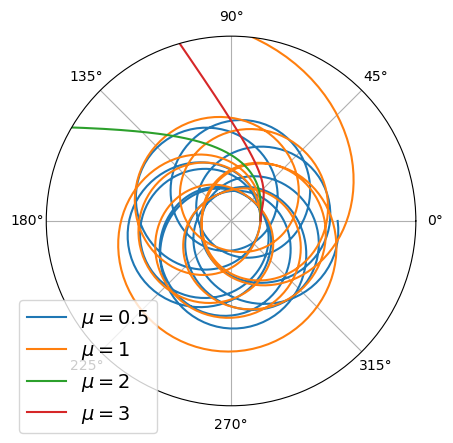

In [71]:
# Solve the ODE 
theta_start, theta_end = 0, 20*np.pi
theta_values = np.linspace(theta_start, theta_end, 1000)

ax = plt.axes(projection='polar')

for m_val in [0.5, 1, 2, 3]:
    solution = solve_ivp(
        fun=lambda theta, y: orbit_ode(theta, y, u_val, R_val, m_val, l_val),
        t_span=(theta_start, theta_end),
        y0=[r0, dr_dtheta0],
        t_eval=theta_values,
        method='RK45'
    )
    
    # Plot the orbital path 
    ax.plot(solution.t, solution.y[0], label=f'$\mu = {m_val}$')

ax.set_ylim(0,5)
ax.set_yticks([])
plt.legend(loc='lower left', bbox_to_anchor=(-0.1, -0.1), fontsize=14)
plt.show()